In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('heart.csv')     
df.info()
df.head(10)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
df.describe()
df.shape

(1025, 14)

Checking null values

In [4]:
print(df.isnull().sum())
print(df.notnull().sum())
print(df.dtypes)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [1]:
if(df.notnull().sum()==0)print("Dataset Is clean")

SyntaxError: invalid syntax (156143609.py, line 1)

So Null Values are absent in dataset. As compared to Diabetes dataset, Data is rather clean.

Data Visualization

C:\Users\91762\AppData\Local\Temp\ipykernel_6672\1877069414.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\91762\AppData\Local\Temp\ipykernel_6672\1877069414.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\91762\AppData\Local\Temp\ipykernel_6672

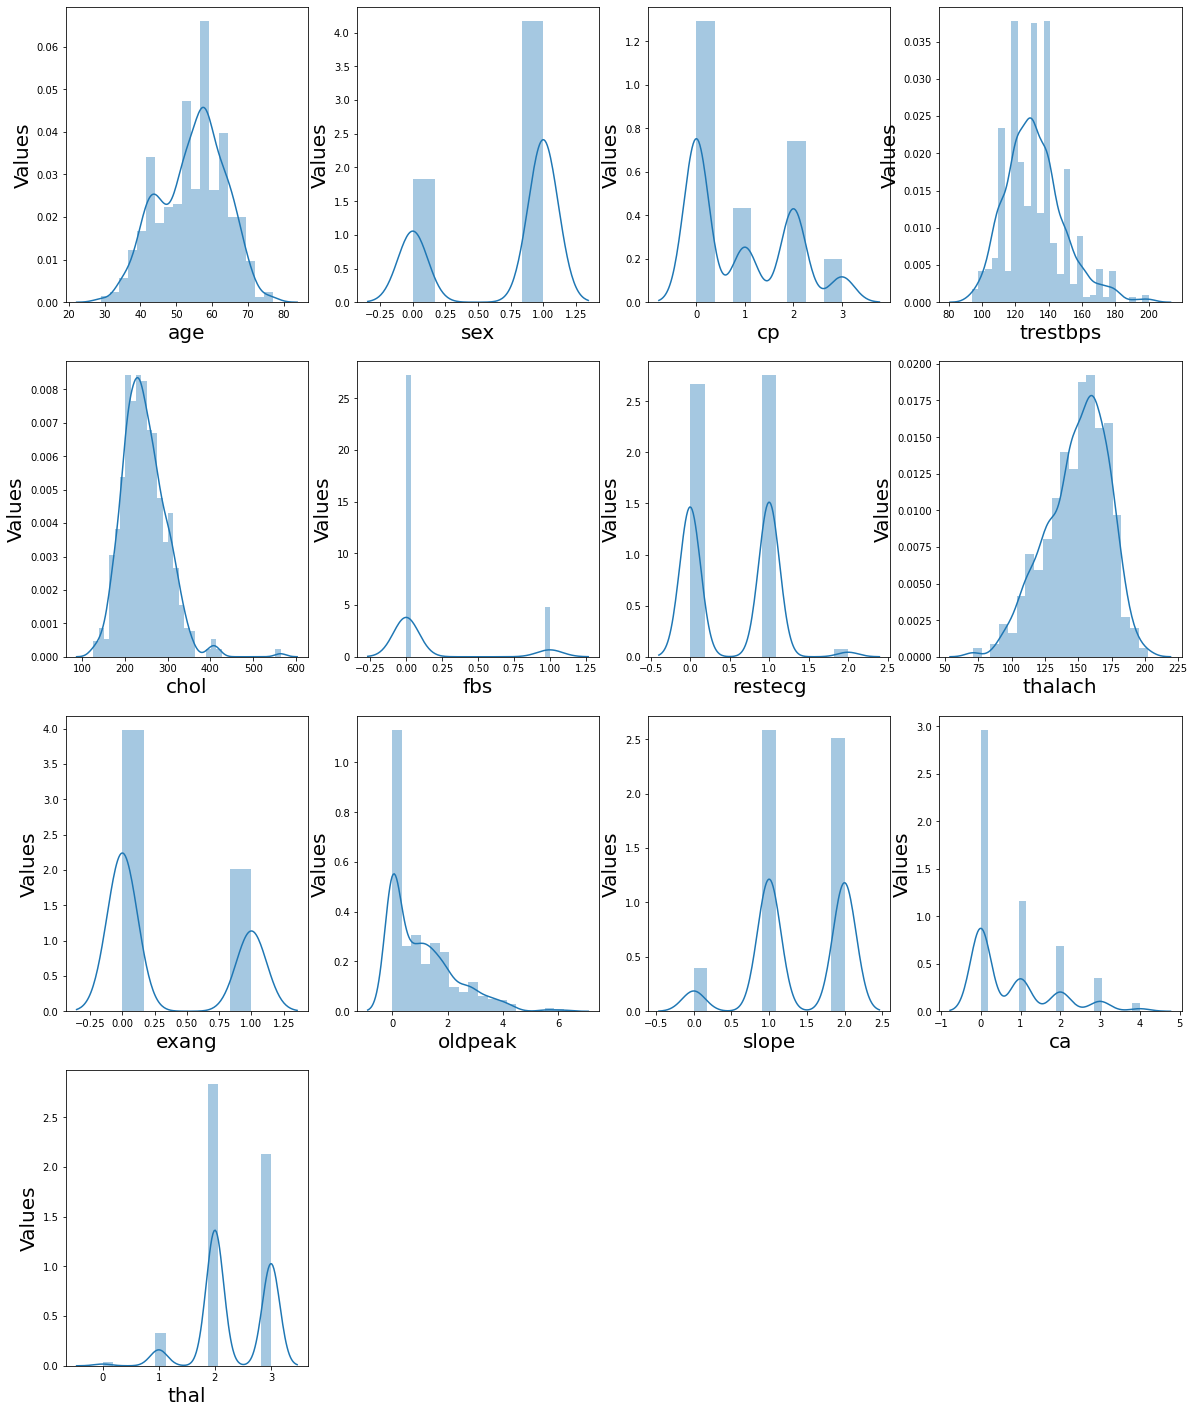

In [5]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

1    526
0    499
Name: target, dtype: int64


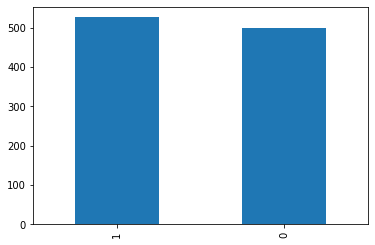

In [6]:
#Now, let’s check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["target"].map(lambda x: color_wheel.get(x + 1))
print(df.target.value_counts())
p=df.target.value_counts().plot(kind="bar")

In [7]:
x =  df.drop(["target"],axis = 1)
y=df['target']

In [8]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=30)

1. Logistic Regression

In [9]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

Log_Reg_acc=accuracy_score(y_test,y_pred)
accuracies['LR']=Log_Reg_acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 83.12412831241282 %
Testing accuracy score of the model is: 85.71428571428571 %


c:\Users\91762\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

# print("Classification Report",classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       158
           1       0.81      0.92      0.86       150

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



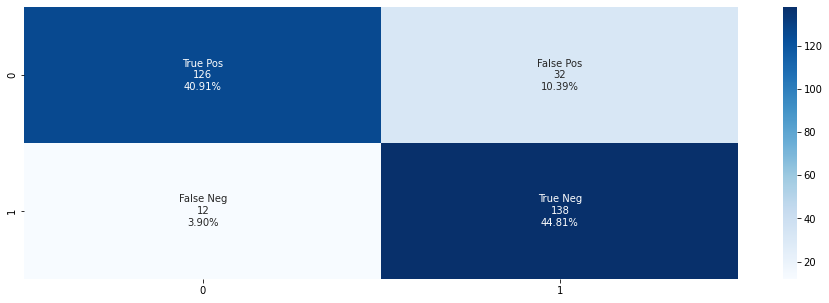

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,y_pred))

2. KNearestNeighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

Knn_acc=accuracy_score(y_test,y_pred1)
accuracies['KNN']=Knn_acc*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 80.3347280334728 %
Testing accuracy score of the model is: 70.45454545454545 %


In [13]:
# print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

# print("Classification Report",classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       158
           1       0.69      0.72      0.70       150

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.71      0.70      0.70       308



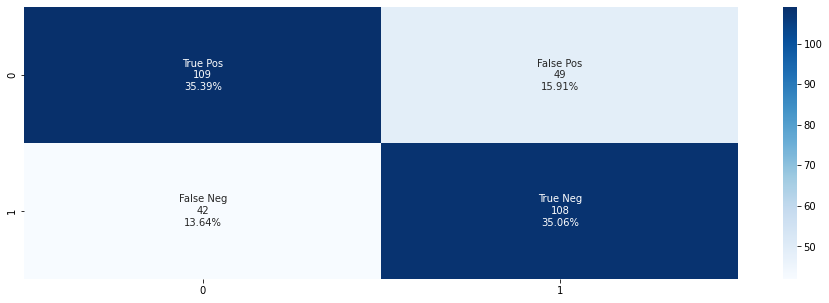

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred1)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,y_pred1))

3.SVM(Support Vector Machine)

In [15]:
from sklearn.svm import SVC

svc = SVC(probability= True,kernel='linear')
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

Svm_acc=accuracy_score(y_test,y_pred2)
accuracies['SVM']=Svm_acc*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 85.49511854951184 %
Testing accuracy score of the model is: 86.36363636363636 %


In [16]:
# print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

# print("Classification Report",classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85       158
           1       0.80      0.95      0.87       150

    accuracy                           0.86       308
   macro avg       0.87      0.87      0.86       308
weighted avg       0.88      0.86      0.86       308



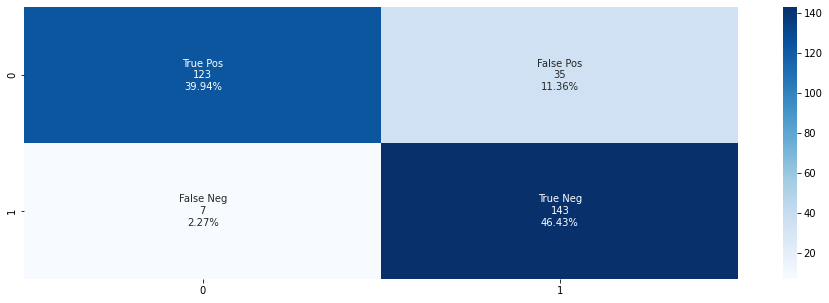

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred2)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,y_pred2))

In [18]:
# Get coefficient magnitudes
coef_magnitudes = abs(svc.coef_[0])

# Print feature importance
Svm_feature_importance=[]
for feature, importance in zip(x_train.columns, coef_magnitudes):
    Svm_feature_importance.append((feature, importance))

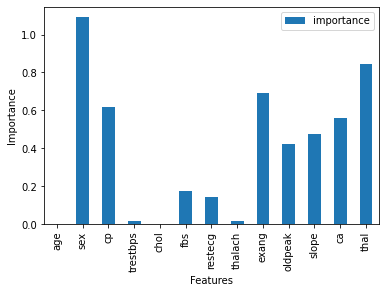

In [19]:
# Plotting the feature importance for the Logistic Regression Model

# Convert the list to a pandas DataFrame
Svm_feature_importance = pd.DataFrame(Svm_feature_importance, columns=['feature', 'importance'])

Svm_feature_importance.plot(kind='bar' , x='feature', y='importance')

# Add axis labels
plt.xlabel('Features')
plt.ylabel('Importance')

# Display the plot
plt.show()

Text(0.5, 0, 'Permutation Importance')

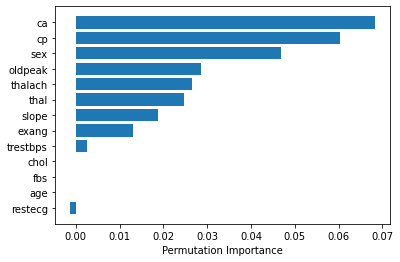

In [20]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc, x_test, y_test)

feature_names = ['age', 
'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang','oldpeak','slope','ca','thal']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

4.Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

Dtree_acc=accuracy_score(y_test,y_pred3)
accuracies['DT']=Dtree_acc*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 96.42857142857143 %


In [22]:
# print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

# print("Classification Report",classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       158
           1       0.95      0.98      0.96       150

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



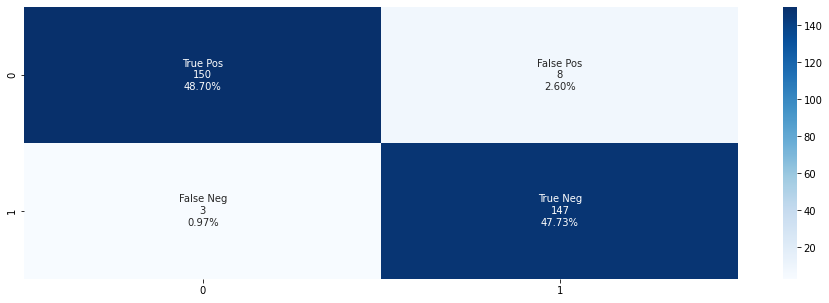

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred3)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,y_pred3))

<Axes: >

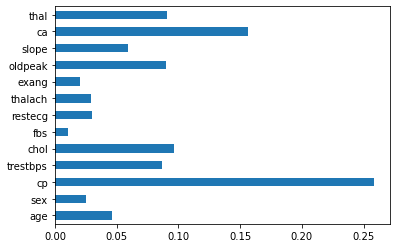

In [24]:
(pd.Series(dtc.feature_importances_, index=x_train.columns).plot(kind='barh'))

In [25]:
Accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree'],
    'Score': [Log_Reg_acc, Knn_acc, Svm_acc,  Dtree_acc]
})

Accuracy_df.sort_values(by = 'Score', ascending = False)


,Model,Score
3,Decision Tree,0.964286
2,SVM,0.863636
0,Logistic Regression,0.857143
1,KNN,0.704545


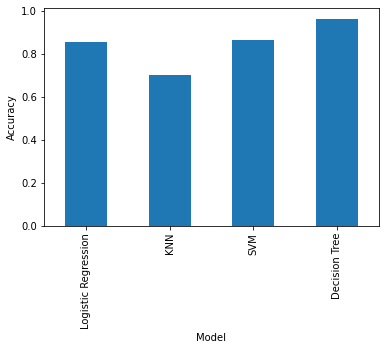

In [26]:
Accuracy_df.set_index('Model', inplace=True)
Accuracy_df.plot(kind='bar', legend=None)
plt.ylabel('Accuracy')
plt.show()

In [27]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
filename = 'Heart_model.sav'
pickle.dump(dtc, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('Heart_model.sav', 'rb'))


c:\Users\91762\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


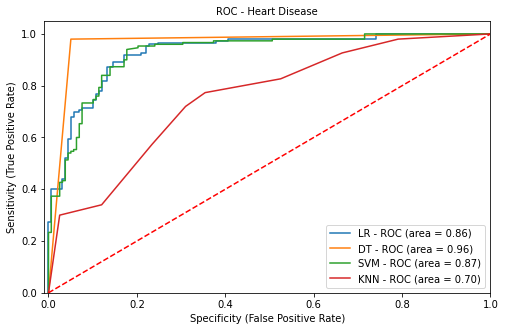

In [28]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)', fontsize=10)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=10)
plt.title('ROC - Heart Disease', fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.show()